In [1]:
import numpy as np
import math

In [2]:
l1 = 1
l2 = 2
l3 = -3
v1 = np.array([4,5,1])
v2 = np.array([-4,0,-4])
v3 = np.array([1,3,2])

l1*v1 + l2*v2 + l3*v3

array([ -7,  -4, -13])

In [3]:
v1 = [4,5,1]
v2 = [-4,0,-4]
v3 = [1,3,2]

l1*v1 + l2*v2 + l3*v3
# 리스트에 마이너스 곱하면 사라지네

[4, 5, 1, -4, 0, -4, -4, 0, -4]

## [Problem 2-1]

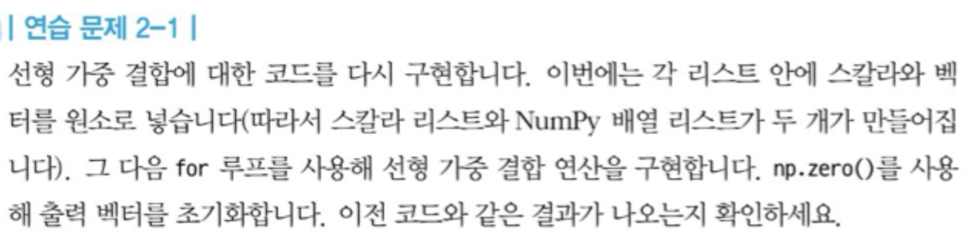

In [4]:
list_scalar = [1, 2, 3, 4]
list_numpy  = np.array([-3, 2, 1, 5])

In [5]:
lin_comb = 0
for i in range(len(list_scalar)):
    lin_comb += list_scalar[i] * list_numpy[i]

print(lin_comb)

24


이런 의도가 아니었다.

- list 안에 list를 넣으란 말이었구나

In [6]:
import random

In [7]:
l1 = random.choices(range(10), k=3)
l2 = random.choices(range(10), k=3)
l3 = random.choices(range(10), k=3)

In [8]:
n1 = np.random.randint(-10, 10, 3)
n2 = np.random.randint(-10, 10, 3)
n3 = np.random.randint(-10, 10, 3)

In [9]:
list_scalar = [l1, l2, l3]
list_numpy  = [n1, n2, n3]

print(f'list_scalar: \n{list_scalar}')
print()
print(f'list_numpy: \n{list_numpy}')

list_scalar: 
[[3, 0, 4], [8, 3, 8], [6, 9, 9]]

list_numpy: 
[array([-7,  1, -8]), array([-3, -6,  2]), array([-10,   8,  -6])]


In [10]:
lin_comb = np.zeros(len(list_scalar))

for i, (u, v) in enumerate(zip(list_scalar, list_numpy)):
    print(u, v)
    lin_comb[i] = np.dot(u, v)
    print(lin_comb, '\n')

print(f'최종 결과: {lin_comb}')

[3, 0, 4] [-7  1 -8]
[-53.   0.   0.] 

[8, 3, 8] [-3 -6  2]
[-53. -26.   0.] 

[6, 9, 9] [-10   8  -6]
[-53. -26. -42.] 

최종 결과: [-53. -26. -42.]


## [Problem 2-3]

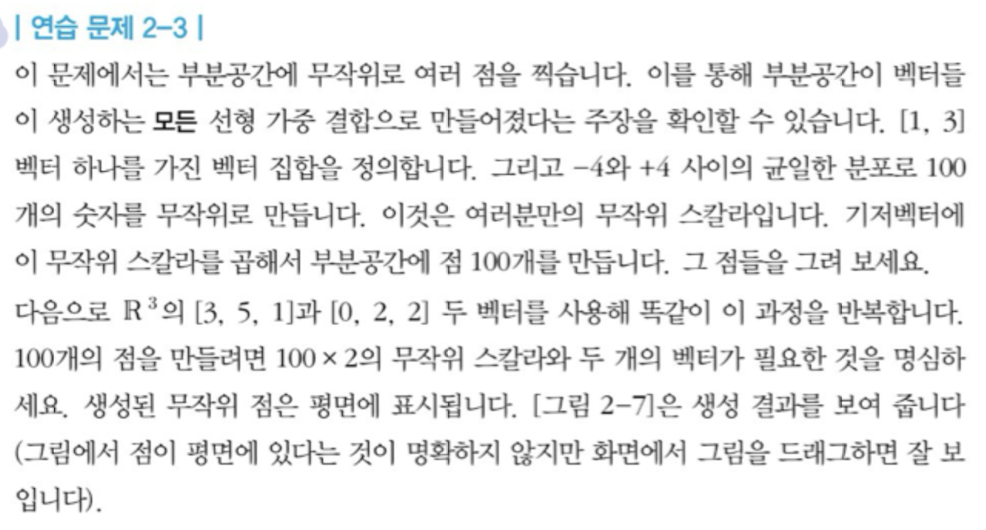

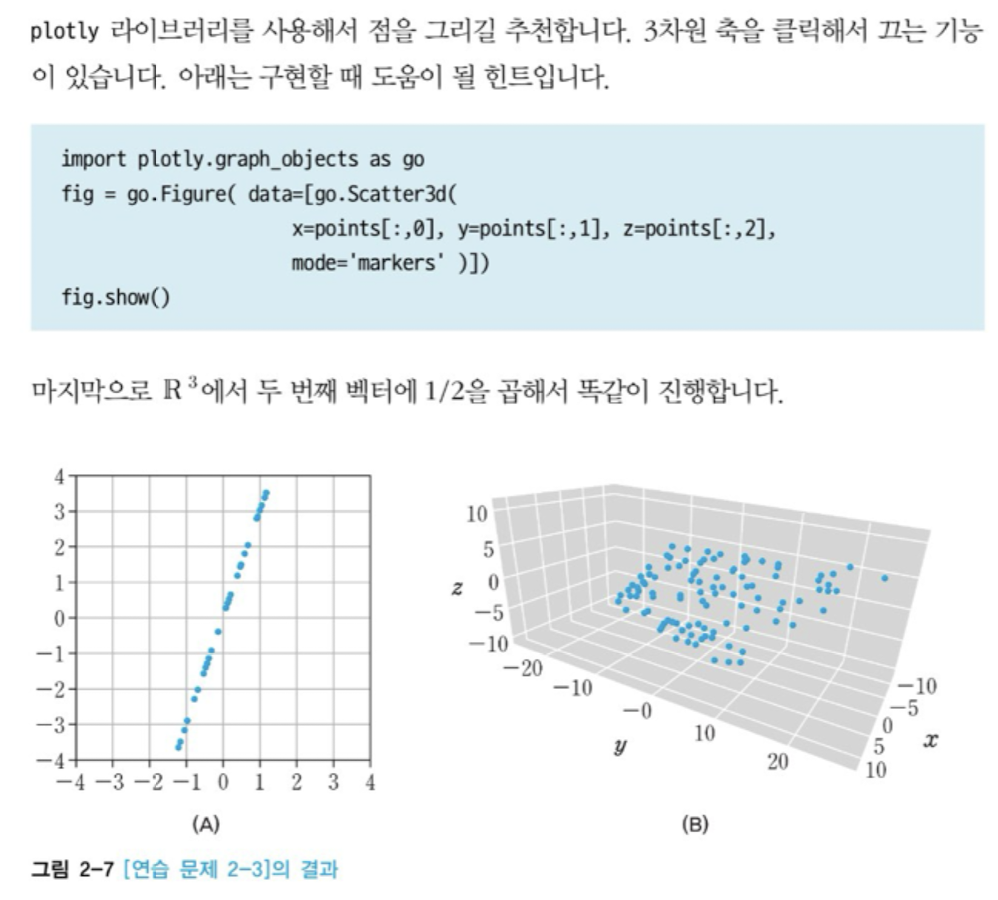

### (1, 3) Subspace

In [11]:
# (1, 3) 벡터 정의
v = np.array([[1, 3]]).T
v

# -4와 4 사이의 Uniform distn에서 100개 숫자 생성
x = np.random.uniform(-4, 4, 100)
x

array([-0.37023491,  2.24679354,  0.97901065,  1.92738882,  1.24239163,
       -0.5679447 ,  3.42774548,  1.78455851,  0.55485891,  2.55591417,
       -2.08996011,  3.83446907, -3.19893963, -1.46454074,  0.24731417,
       -2.14145419, -0.99482408, -1.64018168,  0.60667235,  2.14835347,
        0.11605937,  3.41644219,  2.10362069,  2.84858529,  0.84039098,
        3.08588424,  1.37384033, -2.23549149, -0.69738235,  1.21223489,
       -1.0414865 , -1.37381917, -3.29664688,  2.18789472, -2.05942977,
        2.60076115,  2.44501609,  3.44436991, -0.1351182 , -0.92740858,
       -3.95314358,  2.49523527,  1.32127413,  0.48063496,  2.73441493,
        1.28478747,  1.6210467 ,  1.49753344,  3.19846343, -3.19163738,
       -1.4797867 , -1.25746685, -1.47548708,  3.14338932,  3.85753181,
        3.74431423,  1.90562479, -3.55935332, -1.11254393,  1.57405827,
        3.70515845, -0.34358524, -1.42328351,  3.78992361, -0.95068537,
       -3.71957771,  1.09275264,  2.10719761,  3.86477991, -1.99

In [12]:
# 기저벡터에 이 무작위 스칼라를 곱 -> 부분공간에 점 100개
  # 시각화 해봐라
v_100 = v * x
v_100.shape # 2x100

v_100

array([[ -0.37023491,   2.24679354,   0.97901065,   1.92738882,
          1.24239163,  -0.5679447 ,   3.42774548,   1.78455851,
          0.55485891,   2.55591417,  -2.08996011,   3.83446907,
         -3.19893963,  -1.46454074,   0.24731417,  -2.14145419,
         -0.99482408,  -1.64018168,   0.60667235,   2.14835347,
          0.11605937,   3.41644219,   2.10362069,   2.84858529,
          0.84039098,   3.08588424,   1.37384033,  -2.23549149,
         -0.69738235,   1.21223489,  -1.0414865 ,  -1.37381917,
         -3.29664688,   2.18789472,  -2.05942977,   2.60076115,
          2.44501609,   3.44436991,  -0.1351182 ,  -0.92740858,
         -3.95314358,   2.49523527,   1.32127413,   0.48063496,
          2.73441493,   1.28478747,   1.6210467 ,   1.49753344,
          3.19846343,  -3.19163738,  -1.4797867 ,  -1.25746685,
         -1.47548708,   3.14338932,   3.85753181,   3.74431423,
          1.90562479,  -3.55935332,  -1.11254393,   1.57405827,
          3.70515845,  -0.34358524,  -1.

In [13]:
import plotly.express as px

In [14]:
# fig = go.Figure(data=[go.Scatter3d(
#     x=v_100[0], y=v_100[1], mode='markers')])
# fig

fig = px.scatter(x=v_100[0], y=v_100[1]) # Scatter3d를 쓰고, z=points[:,1]*0로 해줘도 된다

fig.show()

### $\mathbb{R^3}$ Subspace

In [15]:
# R^3의 [3, 5, 1], [0, 2, 2] 두 벡터를 사용해 똑같이 진행

In [16]:
w = np.array([[3, 5, 1],
              [0, 2, 2]]).T

In [17]:
x_2 = np.random.uniform(-4, 4, (100,2))
x_2

array([[-3.08878674,  0.22746964],
       [ 3.69870594, -0.42687597],
       [ 2.29490338, -1.47792609],
       [ 0.93701327, -1.85758213],
       [-0.04831129, -0.89339614],
       [ 0.89758168,  0.88494787],
       [-1.09242031, -2.2839208 ],
       [-0.43889243, -3.16942593],
       [ 2.54889232,  2.00889586],
       [-2.42905862, -1.90988074],
       [-3.77137075,  3.56248548],
       [ 3.69165023,  1.67920841],
       [-2.80277807,  3.05635181],
       [-1.52223084,  3.92393683],
       [ 2.43517499, -2.67180962],
       [-3.38975274,  3.37153251],
       [-1.2436203 ,  1.70947863],
       [-1.01884322, -3.59275667],
       [ 1.54441599, -0.8806442 ],
       [-1.61082758,  2.02876936],
       [-3.61692292, -3.1302516 ],
       [ 3.63667929,  1.87251586],
       [-0.91604946, -3.12209594],
       [ 2.90352958, -3.0256048 ],
       [-0.20811411,  1.32238945],
       [-0.65575096,  1.91429678],
       [ 1.79535151,  3.56231309],
       [-1.04706202, -2.79670262],
       [ 2.93129758,

In [30]:
list_tmp = []
for i in range(x_2.shape[0]):
    tmp = np.sum(w * x_2[i, :], axis=1)
    list_tmp.append(tmp)

yes = np.array(list_tmp).reshape(100, 3)
yes

array([[ -9.26636023, -14.98899443,  -2.63384746],
       [ 11.09611783,  17.63977778,   2.84495401],
       [  6.88471014,   8.51866473,  -0.66094879],
       [  2.8110398 ,   0.96990208,  -2.77815099],
       [ -0.14493388,  -2.02834873,  -1.83510357],
       [  2.69274503,   6.25780413,   2.66747742],
       [ -3.27726092, -10.02994314,  -5.66026191],
       [ -1.31667729,  -8.53331401,  -6.77774429],
       [  7.64667697,  16.76225333,   6.56668404],
       [ -7.28717585, -15.96505456,  -6.24882009],
       [-11.31411224, -11.73188277,   3.35360021],
       [ 11.07495068,  21.81666795,   7.05006704],
       [ -8.40833422,  -7.90118676,   3.30992554],
       [ -4.56669252,   0.23671946,   6.32564282],
       [  7.30552497,   6.8322557 ,  -2.90844426],
       [-10.16925823, -10.2056987 ,   3.35331227],
       [ -3.7308609 ,  -2.79914424,   2.17533697],
       [ -3.05652965, -12.27972941,  -8.20435655],
       [  4.63324797,   5.96079154,  -0.21687241],
       [ -4.83248274,  -3.99659

In [19]:
import plotly.graph_objects as go

In [34]:
fig = go.Figure(data=[go.Scatter3d(
  x= yes[:, 0],
  y= yes[:, 1],
  z= yes[:, 2], mode='markers',
                marker= dict(size=3)
                )])

fig.show()

In [37]:
# R^3에서 [3, 5, 1], [0, 2, 2] 두 번째 벡터에 1/2를 곱해서 똑같이 진행
w_2 = np.array([[3, 5, 1],
              [0/2, 2/2, 2/2]]).T

array([[3., 0.],
       [5., 1.],
       [1., 1.]])

In [38]:
list_tmp = []
for i in range(x_2.shape[0]):
    tmp = np.sum(w_2 * x_2[i, :], axis=1)
    list_tmp.append(tmp)

yes = np.array(list_tmp).reshape(100, 3)
yes

array([[-9.26636023e+00, -1.52164641e+01, -2.86131710e+00],
       [ 1.10961178e+01,  1.80666537e+01,  3.27182998e+00],
       [ 6.88471014e+00,  9.99659081e+00,  8.16977294e-01],
       [ 2.81103980e+00,  2.82748421e+00, -9.20568863e-01],
       [-1.44933875e-01, -1.13495260e+00, -9.41707428e-01],
       [ 2.69274503e+00,  5.37285625e+00,  1.78252955e+00],
       [-3.27726092e+00, -7.74602233e+00, -3.37634111e+00],
       [-1.31667729e+00, -5.36388808e+00, -3.60831836e+00],
       [ 7.64667697e+00,  1.47533575e+01,  4.55778818e+00],
       [-7.28717585e+00, -1.40551738e+01, -4.33893936e+00],
       [-1.13141122e+01, -1.52943682e+01, -2.08885266e-01],
       [ 1.10749507e+01,  2.01374595e+01,  5.37085863e+00],
       [-8.40833422e+00, -1.09575386e+01,  2.53573733e-01],
       [-4.56669252e+00, -3.68721737e+00,  2.40170599e+00],
       [ 7.30552497e+00,  9.50406532e+00, -2.36634635e-01],
       [-1.01692582e+01, -1.35772312e+01, -1.82202364e-02],
       [-3.73086090e+00, -4.50862287e+00

In [39]:
fig = go.Figure(data=[go.Scatter3d(
  x= yes[:, 0],
  y= yes[:, 1],
  z= yes[:, 2], mode='markers',
                marker= dict(size=3)
                )])

fig.show()